<a href="https://colab.research.google.com/github/alexgualberto/GST24/blob/main/ANALISE_MGLU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDA - SERIES TEMPORAIS FINANÇAS

## IMPORTANDO OS DADOS E LIBS


In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Criar o dataset com as ações que eu quero analisar

In [ ]:
acao = ["MGLU3.SA"]

In [ ]:
df = pd.DataFrame()
for i in acao:
    df[i] = yf.download(i, start='2015-01-01')['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,MGLU3.SA
Date,
2015-01-02,2.058074
2015-01-05,2.096750
2015-01-06,2.069125
2015-01-07,2.138187
2015-01-08,2.121612


In [ ]:
df.shape

(2505, 1)

In [ ]:
df.describe()

,MGLU3.SA
count,2505.000000
mean,54.220249
std,66.000606
min,0.279106
25%,8.901189
50%,28.223890
75%,62.199001
max,256.293243


In [ ]:
df.tail()

,MGLU3.SA
Date,
2025-01-21,6.16
2025-01-22,6.37
2025-01-23,6.29
2025-01-24,6.37
2025-01-28,6.92


In [ ]:
missing_data = df.isna().sum()
missing_data

,0
MGLU3.SA,0


Observa-se que a ação HASH11 não estava sendo vendida em bolsa no começo da apuração desse dataset .

Curiosidade sobre a carteira HASH :  

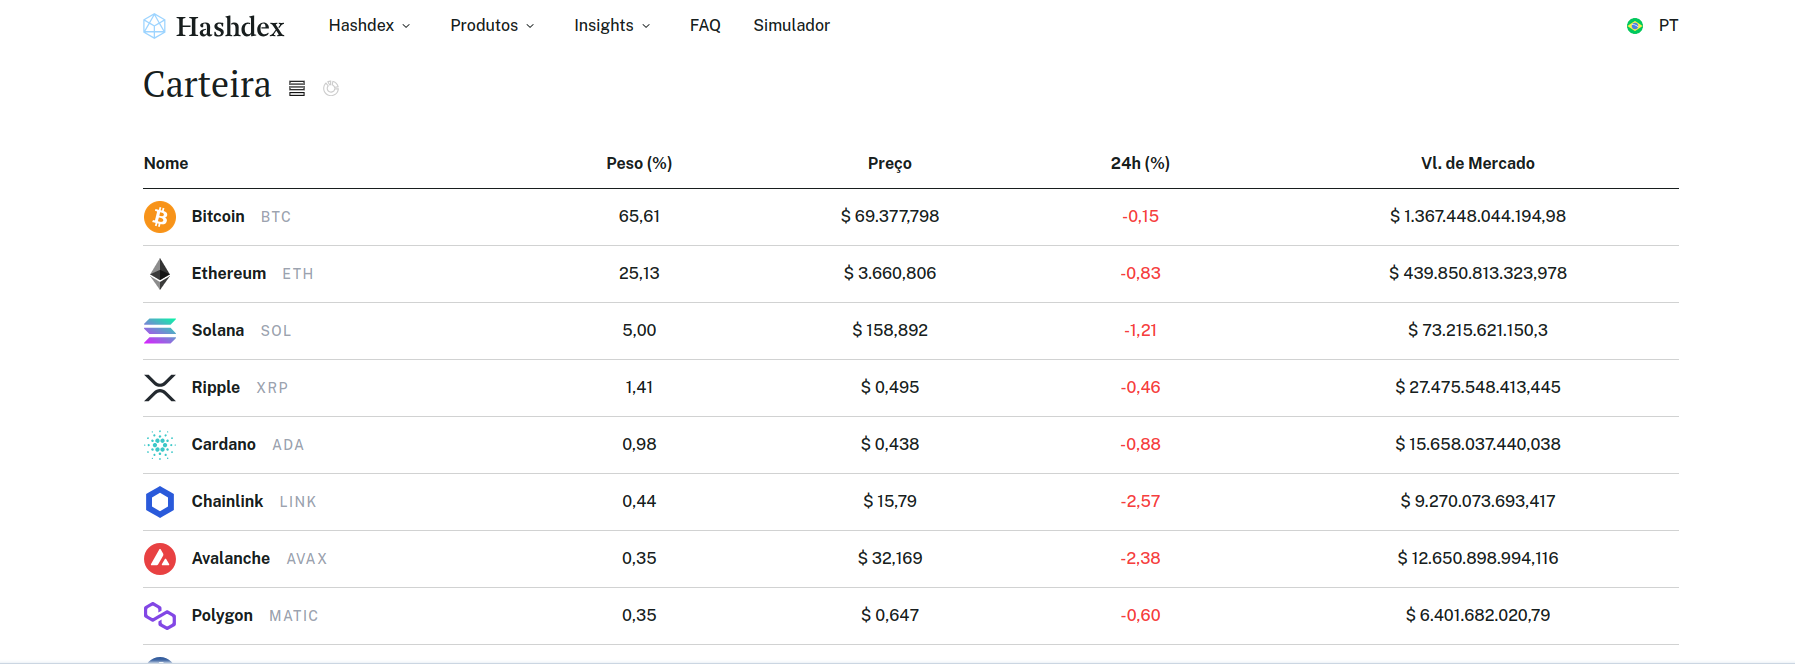

#### Algumas visualizações básicas

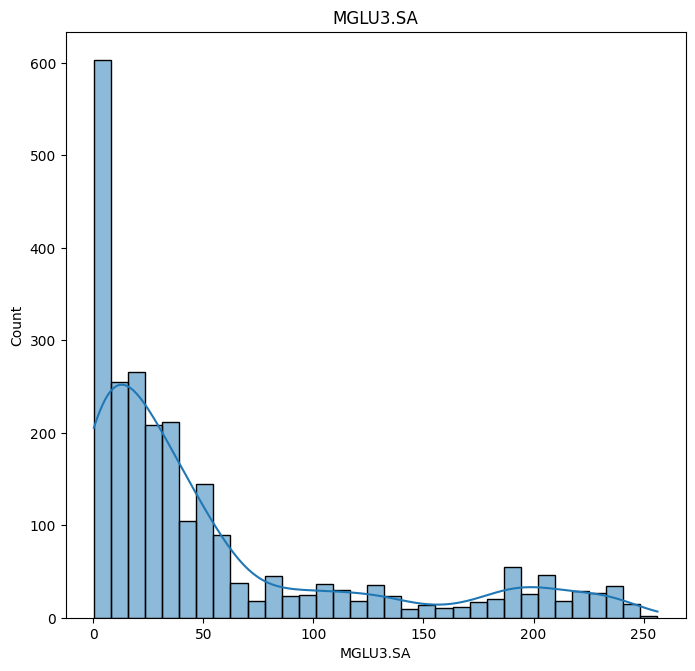

In [ ]:
len(df.columns)
np.arange(0, len(df.columns))
plt.figure(figsize=(8,35))
i = 1
for i in np.arange(0, len(df.columns)):
  plt.subplot(4, 1, i + 1)
  sns.histplot(df[df.columns[i]], kde = True)
  plt.title(df.columns[i])

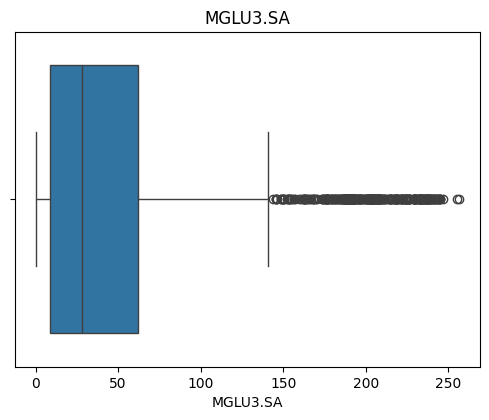

In [ ]:
plt.figure(figsize=(6,20))
i = 0
for i in np.arange(0, len(df.columns)):
  plt.subplot(4, 1, i + 1)
  sns.boxplot(x = df[df.columns[i]])
  plt.title(df.columns[i])

In [ ]:
df.head()

,MGLU3.SA
Date,
2015-01-02,2.058074
2015-01-05,2.096750
2015-01-06,2.069125
2015-01-07,2.138187
2015-01-08,2.121612


In [ ]:
df_1 = df.copy()

In [ ]:
df_1.reset_index(inplace=True)

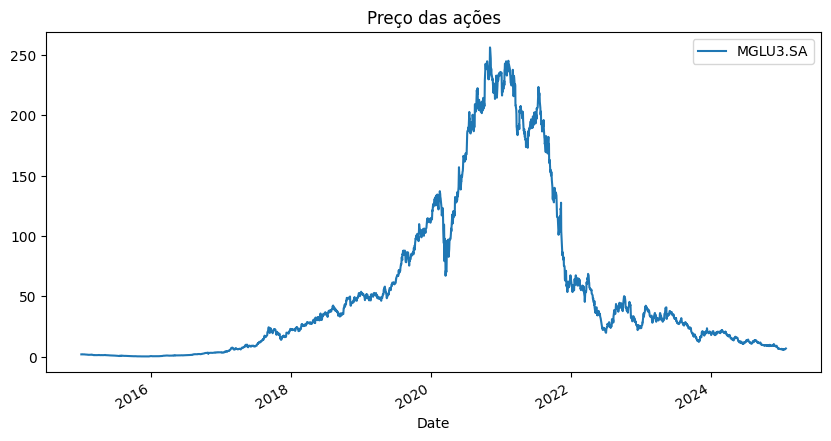

In [ ]:
df_1.plot(x = 'Date', figsize = (10,5), title = 'Preço das ações');

SUGESTÕES :

### PARTE 2

Normalizar o dataset para observar melhor o retorno

In [ ]:
dataset_normalizado = df_1.copy()
for i in dataset_normalizado.columns[1:]:
  dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [ ]:
dataset_normalizado.head()

,Date,MGLU3.SA
0,2015-01-02,1.000000
1,2015-01-05,1.018793
2,2015-01-06,1.005370
3,2015-01-07,1.038927
4,2015-01-08,1.030873


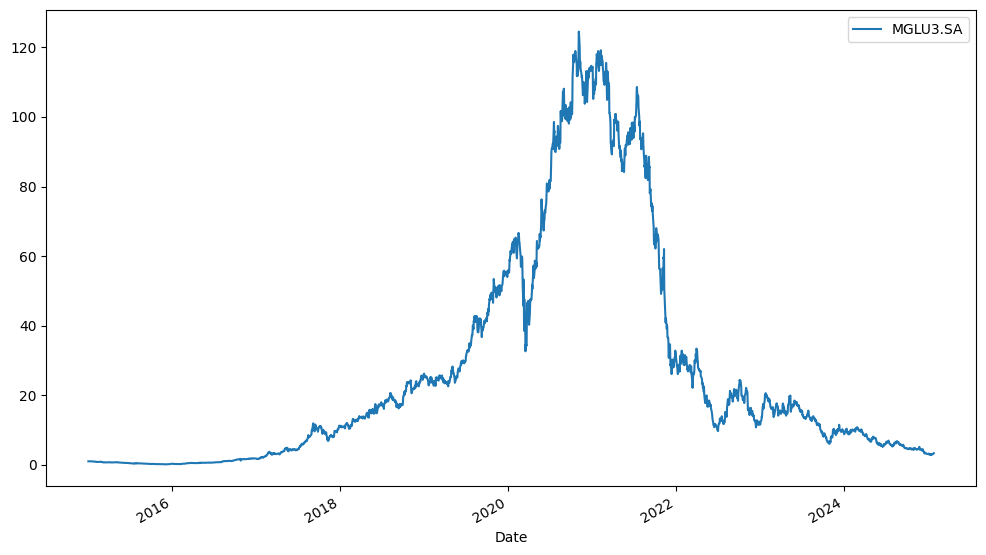

In [ ]:
dataset_normalizado.plot(x = 'Date', figsize=(12, 7));

#### Aplicando conhecimentos de Séries Temporais

In [ ]:
!pip install pmdarima

In [ ]:
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [ ]:
dataset = pd.DataFrame()

dataset["MGLU3"] = yf.download(i, start='2017-01-01')['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2010 entries, 2017-01-02 to 2025-01-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MGLU3   2010 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [ ]:
time_series =df

In [ ]:
time_series

,MGLU3.SA
Date,
2015-01-02,2.058074
2015-01-05,2.096750
2015-01-06,2.069125
2015-01-07,2.138187
2015-01-08,2.121612
...,...
2025-01-21,6.160000
2025-01-22,6.370000
2025-01-23,6.290000


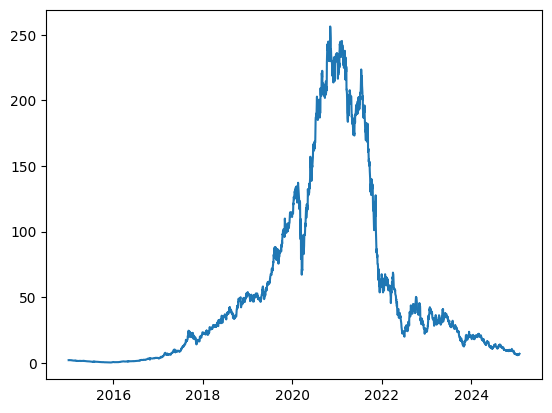

In [ ]:
plt.plot(time_series)

In [ ]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [ ]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

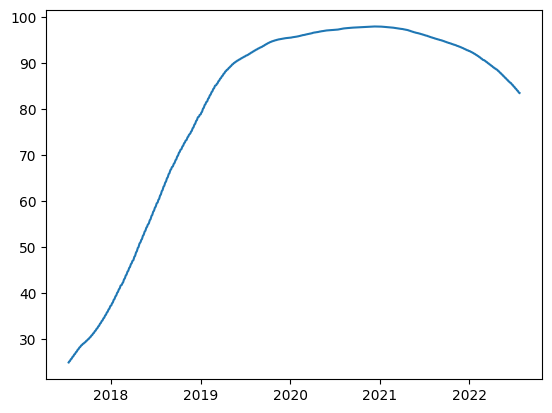

In [ ]:
plt.plot(tendencia);

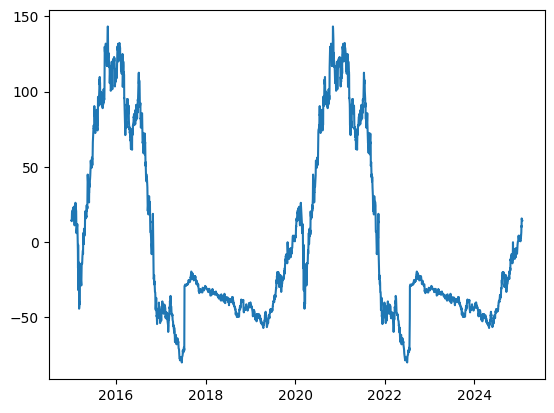

In [ ]:
plt.plot(sazonal);

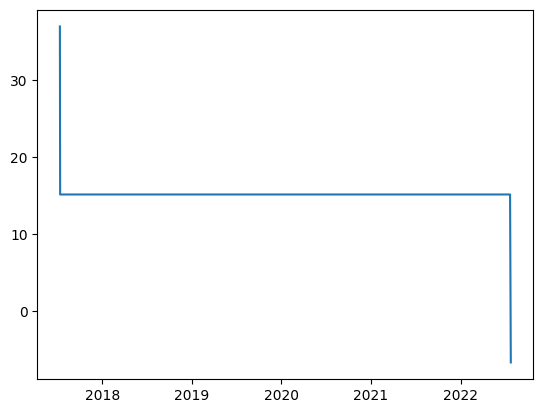

In [ ]:
plt.plot(aleatorio);

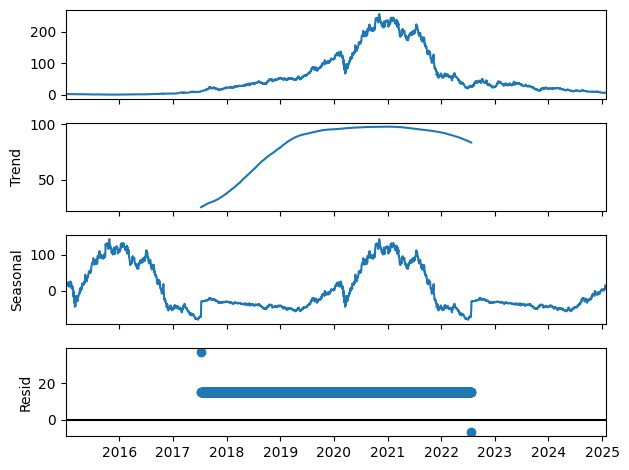

In [ ]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)
tendencia = decomposicao.trend
sazonalidade = decomposicao.seasonal
residuo = decomposicao.resid
decomposicao.plot()
plt.show()

#### AUTO ARIMA

In [ ]:
len(time_series)

2505

In [ ]:
treinamento = time_series[:2445]
treinamento.shape

(2445, 1)

In [ ]:
teste = time_series[2445:]
teste.shape

(60, 1)

In [ ]:
model = auto_arima(treinamento, seasonal=False, stepwise=True, trace=True, suppress_warnings=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11740.251, Time=5.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11749.541, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11742.094, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11742.343, Time=0.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11747.544, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11746.342, Time=3.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11745.601, Time=5.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11738.848, Time=12.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11747.286, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11744.710, Time=6.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11741.467, Time=10.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11739.609, Time=4.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11741.938, Time=5.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=11736.856, Time=2.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11738.253, Time=2.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=11745.289, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=11742.714, Time=2.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=11739.486, Time=3.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11743.604, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=11737.612, Time=1.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0]             : AIC=11739.942, Time=2.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=5.07 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0]          
Total fit time: 85.248 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2445
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -5862.428
Date:                Tue, 28 Jan 2025   AIC                          11736.856
Time:                        14:21:28   BIC                          11771.665
Sample:                             0   HQIC                         11749.508
                               - 2445                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1893      0.029    -40.654      0.000      -1.247      -1.132
ar.L2         -0.9593      0.030    -32.445      0.000      -1.017      -0.901
ar.L3         -0.0490      0.010     -4.807      0.000      -0.069      -0.029
ma.L1          1.1305      0.030     38.254      0.000       1.073       1.188
ma.L2          0.9187      0.025     36.792      0.000       0.870       0.968
sigma2         7.1030      0.073     97.432      0.000       6.960       7.246
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20011.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              37.51   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = model.predict(n_periods=len(teste))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
forecast

,0
2445,9.171948
2446,9.141572
2447,9.154620
2448,9.166184
2449,9.141403
2450,9.159142
2451,9.161250
2452,9.142942
2453,9.161824
2454,9.156827


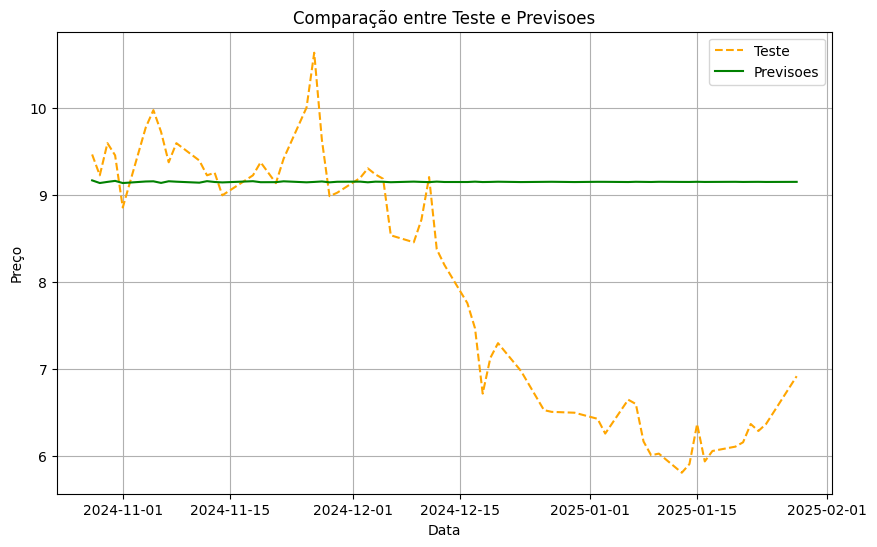

In [ ]:
forecast_df = pd.DataFrame(forecast.values, index=teste.index, columns=['forecast'])

plt.figure(figsize=(10, 6))
plt.plot(teste, label='Teste', color='orange', linestyle='--')
plt.plot(forecast_df, label='Previsoes', color='green')
plt.legend()
plt.title('Comparação entre Teste e Previsoes')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [ ]:
forecast_df

,forecast
Date,
2024-10-28,9.171948
2024-10-29,9.141572
2024-10-30,9.154620
2024-10-31,9.166184
2024-11-01,9.141403
2024-11-04,9.159142
2024-11-05,9.161250
2024-11-06,9.142942
2024-11-07,9.161824


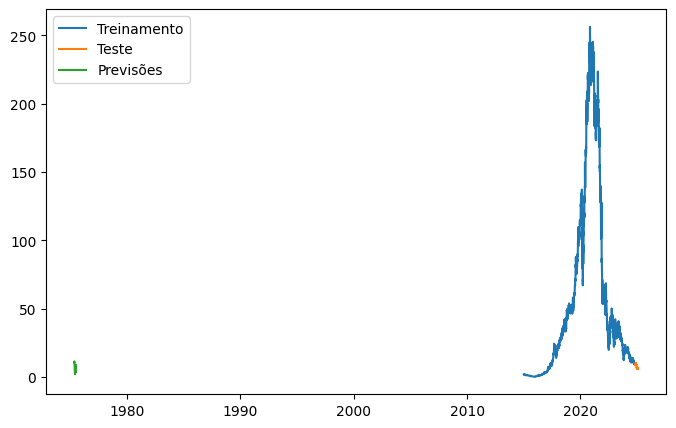

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

#### Métricas ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(teste, forecast_df)
mae = mean_absolute_error(teste, forecast_df)
mape = mean_absolute_percentage_error(teste, forecast_df)
print("AUTO ARIMA")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>)

#### PROPHET

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
dataset = pd.DataFrame()

dataset["MGLU3"] = yf.download(i, start='2017-01-01')['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
dataset.reset_index(inplace=True)

In [ ]:
dataset

,Date,MGLU3
0,2017-01-02,3.625528
1,2017-01-03,3.614478
2,2017-01-04,3.421991
3,2017-01-05,3.539622
4,2017-01-06,3.516809
...,...,...
2005,2025-01-21,6.160000
2006,2025-01-22,6.370000
2007,2025-01-23,6.290000
2008,2025-01-24,6.370000


In [ ]:
dataset = dataset[['Date', 'MGLU3']].rename(columns = {'Date': 'ds', 'MGLU3': 'y'})
dataset

,ds,y
0,2017-01-02,3.625528
1,2017-01-03,3.614478
2,2017-01-04,3.421991
3,2017-01-05,3.539622
4,2017-01-06,3.516809
...,...,...
2005,2025-01-21,6.160000
2006,2025-01-22,6.370000
2007,2025-01-23,6.290000
2008,2025-01-24,6.370000


In [ ]:
modelo = Prophet()
modelo.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvhcaowr/k2cilwf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvhcaowr/f79h7nyv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47198', 'data', 'file=/tmp/tmpyvhcaowr/k2cilwf8.json', 'init=/tmp/tmpyvhcaowr/f79h7nyv.json', 'output', 'file=/tmp/tmpyvhcaowr/prophet_modelie28dlzc/prophet_model-20250128142720.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = modelo.make_future_dataframe(periods=60)
previsoes = modelo.predict(future)

In [ ]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2065,2025-03-25,2.767606,-15.378205,6.882472,1.284235,4.316639,-7.364361,-7.364361,-7.364361,-0.255574,-0.255574,-0.255574,-7.108787,-7.108787,-7.108787,0.0,0.0,0.0,-4.596755
2066,2025-03-26,2.726777,-15.834967,6.864324,1.172060,4.291224,-7.467029,-7.467029,-7.467029,-0.272555,-0.272555,-0.272555,-7.194474,-7.194474,-7.194474,0.0,0.0,0.0,-4.740252
2067,2025-03-27,2.685948,-15.785566,7.352302,1.023043,4.278711,-7.356093,-7.356093,-7.356093,-0.122540,-0.122540,-0.122540,-7.233553,-7.233553,-7.233553,0.0,0.0,0.0,-4.670145
2068,2025-03-28,2.645120,-15.735310,5.813459,0.901131,4.265974,-7.340464,-7.340464,-7.340464,-0.113691,-0.113691,-0.113691,-7.226773,-7.226773,-7.226773,0.0,0.0,0.0,-4.695345
2069,2025-03-29,2.604291,-14.962350,7.546339,0.786801,4.310959,-6.550461,-6.550461,-6.550461,0.625191,0.625191,0.625191,-7.175652,-7.175652,-7.175652,0.0,0.0,0.0,-3.946170


In [ ]:
len(dataset), len(previsoes)

(2010, 2070)

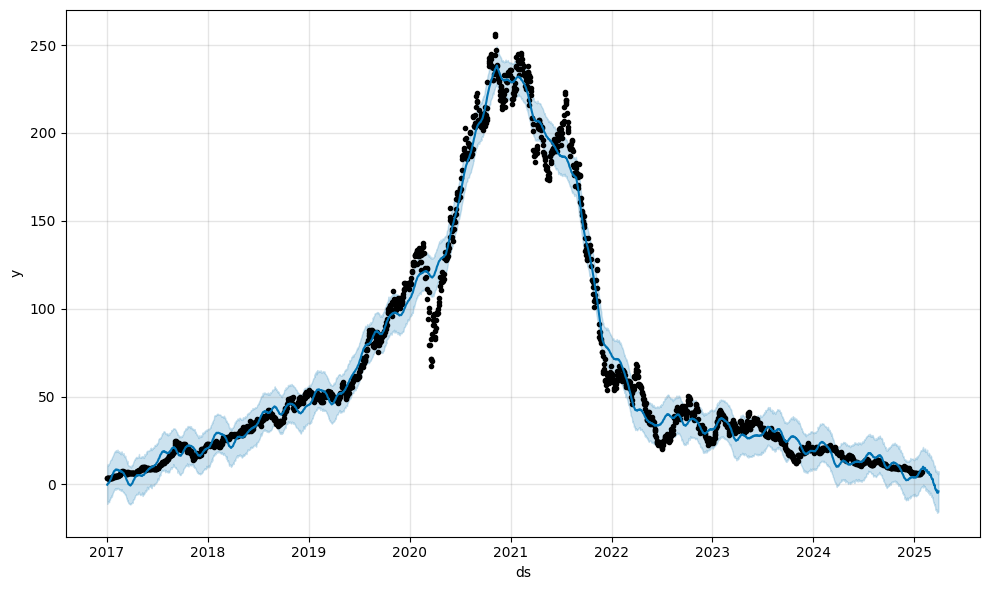

In [ ]:

modelo.plot(previsoes);

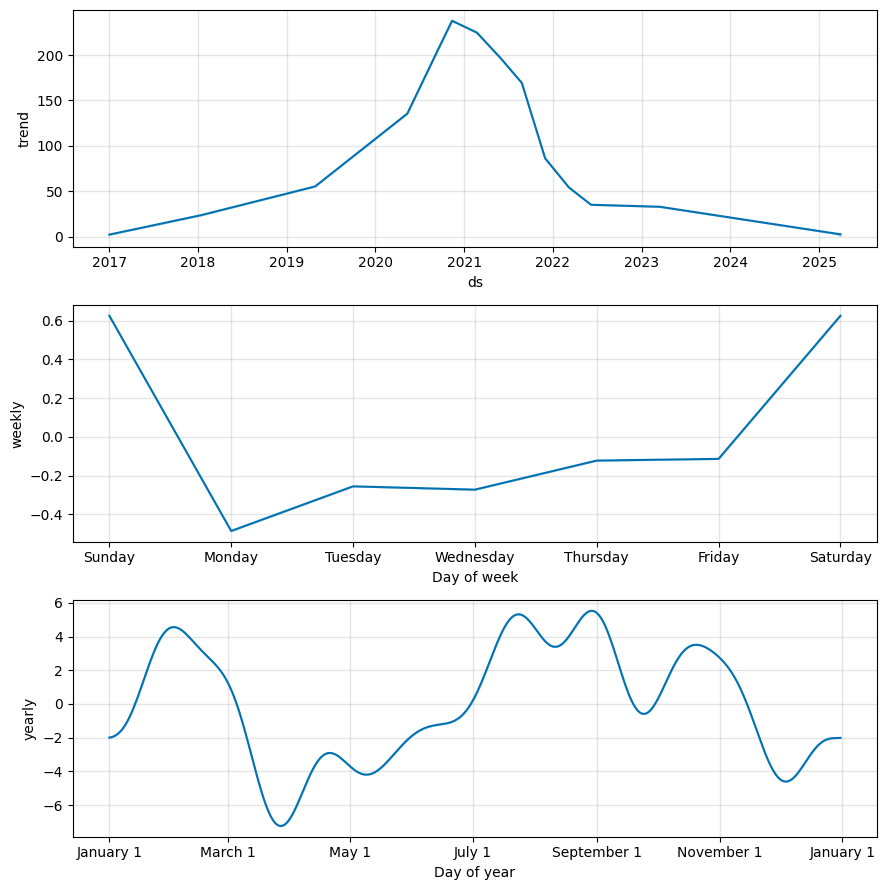

In [ ]:
modelo.plot_components(previsoes);

In [ ]:
teste = dataset[1950:]
teste.shape

(60, 2)

In [ ]:
teste

,ds,y
1950,2024-10-28,9.47
1951,2024-10-29,9.23
1952,2024-10-30,9.60
1953,2024-10-31,9.46
1954,2024-11-01,8.86
1955,2024-11-04,9.78
1956,2024-11-05,9.98
1957,2024-11-06,9.73
1958,2024-11-07,9.38
1959,2024-11-08,9.60


In [ ]:
predict = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(predict)

In [ ]:
previsoes

,yhat
1950,11.431816
1951,11.530135
1952,11.373691
1953,11.376651
1954,11.230332
1955,10.335496
1956,10.369311
1957,10.142602
1958,10.068738
1959,9.838637


In [ ]:
teste['y'].shape , previsoes.shape

((60,), (60,))

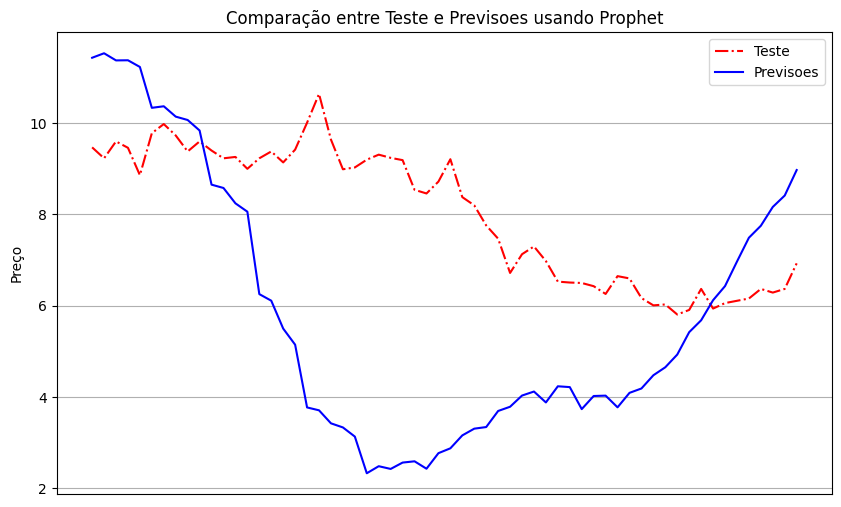

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(teste['y'], label='Teste', color='red', linestyle='-.')
plt.plot(previsoes, label='Previsoes', color='blue')
plt.xticks([])

plt.legend()
plt.title('Comparação entre Teste e Previsoes usando Prophet')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(teste['y'], previsoes)
mae = mean_absolute_error(teste['y'], previsoes)
mape = mean_absolute_percentage_error(teste['y'], previsoes)
print("PROPHET")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

PROPHET
Mean Squared Error (MSE): 13.199905158994135
Mean Absolute Error (MAE): 2.9562130400957685
Mean Absolute Percentage Error (MAPE): 0.35971975763765296
